In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("./csv/AAPL.csv", index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [ ]:
# 결측치 조회
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [17]:
# 결측치를 제외한 데이터를 출력
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
price_df = df.loc[:, ["Adj Close"]].copy()
price_df.head()

In [ ]:
## 종가 그래프로 표현
price_df.plot(figsize = (16,9))

In [20]:
## 일별 수익율 계산 ( (오늘 날짜의 종가 - 어제 날짜의 종가)/어제 날짜의 종가 )
price_df["daily_rtn"] = price_df["Adj Close"].pct_change()
price_df.head()

,Adj Close,daily_rtn
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,-0.052175
1980-12-16,0.360548,-0.073394
1980-12-17,0.369472,0.024751
1980-12-18,0.380182,0.028987


In [ ]:
## buy and hold 전략 누적곱을 계산 한 사례 판다스에 있는 cumprod() 함수를 사용
price_df["st_rtn"] = (1 + price_df['daily_rtn']).cumprod()
price_df.head(10)

In [ ]:
## 누적곱 시각화
price_df['st_rtn'].plot(figsize=(12, 6))

In [24]:
first_date = price_df.index[0]
last_date = price_df.index[-1]
print(first_date, last_date)

1980-12-12 2019-06-24


In [26]:
(price_df.loc[last_date, 'Adj Close'] / price_df.loc[first_date, 'Adj Close'])

485.15924243346933

In [27]:
print("누적 수익 : ", price_df.loc[last_date, 'st_rtn'])

누적 수익 :  485.15924243347024


<AxesSubplot:xlabel='Date'>

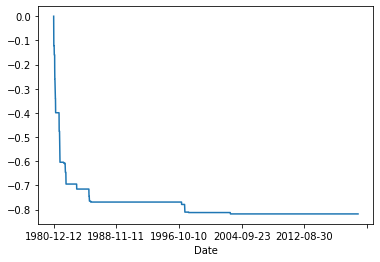

In [29]:
# backtesting 
# cummax() : 종가에서 최고가 저장
# cummin() : 최대 하락 계산

historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()


In [30]:
## CAGR : 일별 data를 사용 -> 
# 전체 연도를 계산하는 경우에는 전체 데이터의 기간을 252 영업일로 나눈 역수를 제곱 한 후 -1
## MDD : 최대 낙폭
## VOL : 연 주가 수익률 표준편차 = 일별 주가 수익률 * 252일 제곱근
## sharpe : 총 위험 1단위당 초과 수익률

CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252/len(price_df.index)) -1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn'])*np.sqrt(252)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252)
MDD = historical_dd.min()

In [33]:
print(VOL)
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(Sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

0.4570483127920232
CAGR :  17.4 %
Sharpe :  0.58
VOL :  45.7 %
MDD :  81.8 %


In [ ]:
pip install finance-datareader

In [ ]:
pip install bs4

In [38]:
## kospi backtesting

import FinanceDataReader as fdr

In [39]:
df1_krx = fdr.StockListing('KRX')
df1_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [40]:
## 코스피 확인
price_df1 = fdr.DataReader("KS11", '2011-01-01', '2018-12-31')
price_df1.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2011-01-03,2070.08,2063.69,2070.09,2054.83,354080000.0,0.0093
2011-01-04,2085.14,2074.56,2085.14,2069.12,415910000.0,0.0073
2011-01-05,2082.55,2083.10,2087.14,2076.92,386060000.0,-0.0012
2011-01-06,2077.61,2094.35,2096.65,2066.10,407830000.0,-0.0024
2011-01-07,2086.20,2073.68,2086.20,2068.66,335560000.0,0.0041


In [41]:
## 일별 수익률 계산
price_df1['daily_rtn'] = price_df1['Close'].pct_change()
price_df1.head()

,Close,Open,High,Low,Volume,Change,daily_rtn
Date,,,,,,,
2011-01-03,2070.08,2063.69,2070.09,2054.83,354080000.0,0.0093,NaN
2011-01-04,2085.14,2074.56,2085.14,2069.12,415910000.0,0.0073,0.007275
2011-01-05,2082.55,2083.10,2087.14,2076.92,386060000.0,-0.0012,-0.001242
2011-01-06,2077.61,2094.35,2096.65,2066.10,407830000.0,-0.0024,-0.002372
2011-01-07,2086.20,2073.68,2086.20,2068.66,335560000.0,0.0041,0.004135


In [42]:
## 누적곱을 계산해서 st_rtn 컬럼 추가
price_df1['st_rtn'] = (1 + price_df1['daily_rtn']).cumprod()
price_df1.head()

,Close,Open,High,Low,Volume,Change,daily_rtn,st_rtn
Date,,,,,,,,
2011-01-03,2070.08,2063.69,2070.09,2054.83,354080000.0,0.0093,NaN,NaN
2011-01-04,2085.14,2074.56,2085.14,2069.12,415910000.0,0.0073,0.007275,1.007275
2011-01-05,2082.55,2083.10,2087.14,2076.92,386060000.0,-0.0012,-0.001242,1.006024
2011-01-06,2077.61,2094.35,2096.65,2066.10,407830000.0,-0.0024,-0.002372,1.003638
2011-01-07,2086.20,2073.68,2086.20,2068.66,335560000.0,0.0041,0.004135,1.007787


In [ ]:
historical_max = price_df1['Close'].cummax()
daily_drawdown = price_df1["Close"] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [44]:
CAGR = price_df1.loc['2018-12-28', 'st_rtn'] ** (252/len(price_df1.index)) - 1
Sharpe = np.mean(price_df1["daily_rtn"]) / np.std(price_df1["daily_rtn"]) * np.sqrt(252)
VOL = np.std(price_df1["daily_rtn"]) * np.sqrt(252)
MDD = historical_dd.min()
print("CAGR : ", round(CAGR*100, 2), '%')
print("Sharpe : ", round(Sharpe, 2))
print("VOL : ", round(VOL*100, 2), '%')
print("MDD : ", round(-1*MDD*100, 2), '%')

CAGR :  -0.18 %
Sharpe :  0.06
VOL :  14.94 %
MDD :  25.85 %
